## Getting ready

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, TimeDistributed
import tensorflow.keras.models

2022-01-20 09:26:06.994428: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Creating a functional model

In [2]:
#1. Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = mnist.load_data()

In [3]:
#2. Create an input node with 28x28 dimensional shape
inputs = tf.keras.Input(shape=(28,28))

In [4]:
#3. Flatten images
flatten_layer = keras.layers.Flatten()

In [5]:
#4. We can add a new node in the graph of layers by calling the flatten_layer on the inputs object
flatten_output = flatten_layer(inputs)

In [6]:
#5. Create a new layer instance
dense_layer = tf.keras.layers.Dense(50, activation='relu')

In [7]:
#6. Create a new node
dense_output = dense_layer(flatten_output)

2022-01-20 09:26:07.847006: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-20 09:26:07.903431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 09:26:07.903783: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-01-20 09:26:07.903798: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-01-20 09:26:07.905314: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-20 09:26:07.905336: I tensorflow/stream_executor/plat

In [8]:
#7. To build a model, multiple layers are stacked. In this example, we will add another dense layer 
# to do a classification task between 10 classes:
predictions = tf.keras.layers.Dense(10, activation='softmax')(dense_output)

In [9]:
#8. Input tensor(s) and output tensor(s) are used to define a model. The model is a function of one or more input
# layers and one or more output layers. The model instance formalized the computational graph on how the data flows
# from input(s) to output(s).
model = keras.Model(inputs=inputs, outputs=predictions)

In [10]:
#9. We can print the summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 11. Such a model can be trained and evaluated by the same compile, fit, evaluate, and predict methods used in 
# the Keras Sequential model
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_mnist_train, y_mnist_train,
          validation_data=(X_mnist_train, y_mnist_train),
          epochs=10)

2022-01-20 09:26:08.384672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-20 09:26:08.403443: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 4200250000 Hz


Epoch 1/10


2022-01-20 09:26:08.536820: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 273/1875 [===>..........................] - ETA: 0s - loss: 60.4536 - accuracy: 0.1624 

2022-01-20 09:26:08.803960: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1875/1875 [==============================] - 2s 933us/step - loss: 10.6582 - accuracy: 0.1736 - val_loss: 2.0927 - val_accuracy: 0.1957
Epoch 2/10
1875/1875 [==============================] - 2s 888us/step - loss: 2.1960 - accuracy: 0.1738 - val_loss: 2.1446 - val_accuracy: 0.1778
Epoch 3/10
1875/1875 [==============================] - 2s 894us/step - loss: 2.2477 - accuracy: 0.1476 - val_loss: 2.2557 - val_accuracy: 0.1329
Epoch 4/10
1875/1875 [==============================] - 2s 895us/step - loss: 2.2321 - accuracy: 0.1583 - val_loss: 2.2821 - val_accuracy: 0.1242
Epoch 5/10
1875/1875 [==============================] - 2s 901us/step - loss: 2.2020 - accuracy: 0.1659 - val_loss: 2.1644 - val_accuracy: 0.1664
Epoch 6/10
1875/1875 [==============================] - 2s 897us/step - loss: 2.1700 - accuracy: 0.1734 - val_loss: 2.1552 - val_accuracy: 0.1760
Epoch 7/10
1875/1875 [==============================] - 2s 884us/step - loss: 2.3010 - accuracy: 0.1178 - val_loss: 2.3012 - val_accur

## Using callable models like layers

In [12]:
x = Input(shape=(784,))
y = model(x)

In [14]:
from keras.layers import TimeDistributed

# Input tensor for sequences of 50 timesteps,
# Each containing a 28X28 dimensional matrix
input_sequences = tf.keras.Input(shape=(10, 28, 28))

# We will apply the previous model to each sequence so for each time step.
# The MNIST model returns a vector with 10 probabilities (one for each digit).
# The TimeDistributed output will be a sequence of 50 vectors of size 10
processed_sequences = tf.keras.layers.TimeDistributed(model)(input_sequences)

## Creating a model with multiple inputs and outputs

In [15]:
house_data_inputs = tf.keras.Input(shape=(128,), name='house_data')
x = tf.keras.layers.Dense(64, activation='relu')(house_data_inputs)
block_1_output = tf.keras.layers.Dense(32, activation='relu')(x)

In [23]:
house_picture_inputs = tf.keras.Input(shape=(128, 128, 3), name='house_picture')
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(house_picture_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = tf.keras.layers.Flatten()(x)

In [24]:
x = tf.keras.layers.concatenate([block_1_output, block_2_output])

In [25]:
price_pred = tf.keras.layers.Dense(1, name='price', activation='relu')(x)

In [26]:
time_elapsed_pred = tf.keras.layers.Dense(2, name='elapsed_time', activation='softmax')(x)

In [27]:
model = keras.Model([house_data_inputs, house_picture_inputs],
                    [price_pred, time_elapsed_pred],
                    name='toy_house_pred')

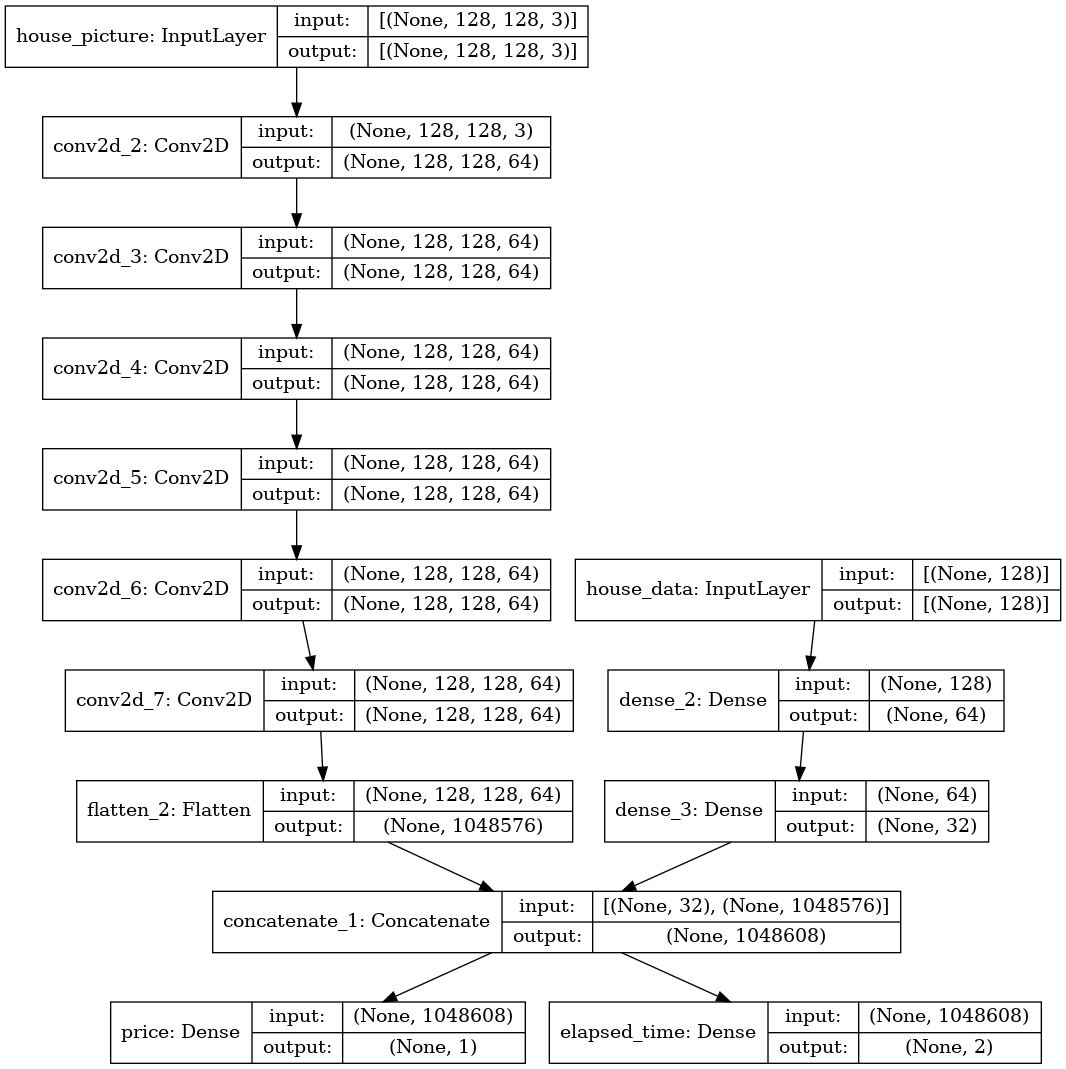

In [28]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Shared layers

In [30]:
# Variable-length sequence of integers
text_input_a = tf.keras.Input(shape=(None,), dtype='int32')

# Variable-length sequence of integers
text_input_b = tf.keras.Input(shape=(None,), dtype='int32')

# Embedding for 1_000 unqiue words mapped to 128-dimensional vectors
shared_embedding = tf.keras.layers.Embedding(1_000, 28)

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## Extracting an reusing nodes in the graph of layers

The tf.keras.application module contains canned architectures with pre-trained weights.

In [32]:
resnet = tf.keras.applications.resnet.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [34]:
intermediate_layers = [layer.output for layer in resnet.layers]

In [36]:
intermediate_layers[:10]

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_8')>,
 <KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_relu')>,
 <KerasTensor: shape=(None, 114, 114, 64) dtype=float32 (created by layer 'pool1_pad')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'pool1_pool')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_conv')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_bn')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_relu')>]

In [37]:
feature_layers = intermediate_layers[:-2]

In [38]:
feat_extraction_model = keras.Model(inputs=resnet.input, outputs=feature_layers)

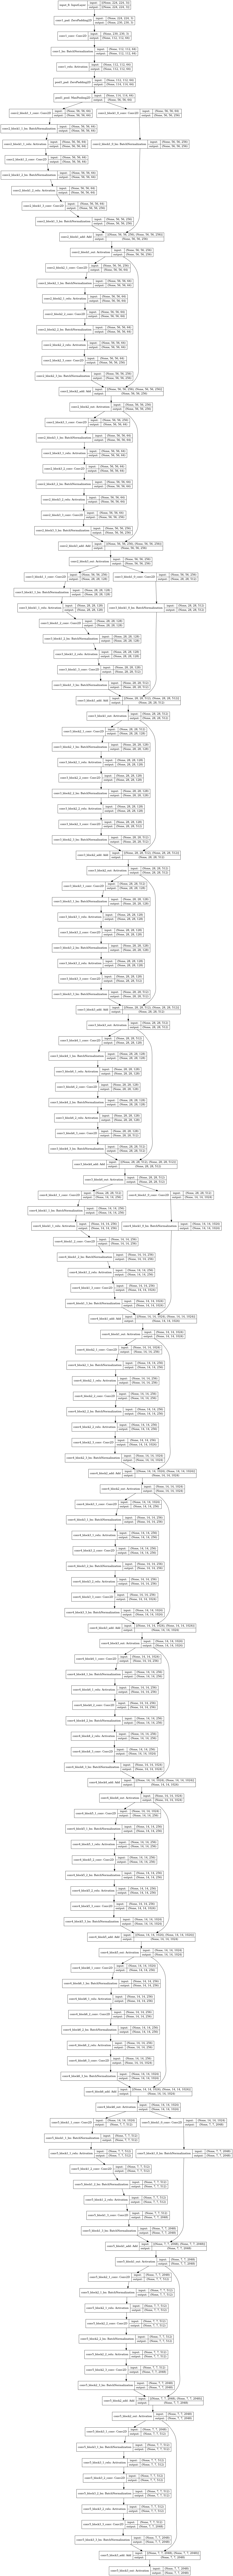

In [39]:
keras.utils.plot_model(feat_extraction_model, 'resnet_feature_layers.png', show_shapes=True)